In [1]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [3]:
# import os

# def combine_csv_files(folder_path):
#     # Lista para almacenar todos los DataFrames
#     df_list = []
    
#     # Recorrer todos los archivos en la carpeta
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".csv"):
#             file_path = os.path.join(folder_path, filename)
#             # Leer cada archivo CSV y agregarlo a la lista
#             df = pd.read_csv(file_path)
#             df_list.append(df)
    
#     # Combinar todos los DataFrames en uno solo
#     combined_df = pd.concat(df_list, ignore_index=True)
    
#     return combined_df

# # Ejemplo de uso
# folder_path_2019 = r'C://Users//Facu//Downloads//EE_Kisangani_reduced'
# combined_df = combine_csv_files(folder_path_2019)

In [2]:
combined_df = pd.read_csv(r"C:\Users\Facu\Downloads\AlphaEarth_GEDI2_samples_2022.csv")

In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96192 entries, 0 to 96191
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  96192 non-null  int64  
 1   A00           96192 non-null  float64
 2   A01           96192 non-null  float64
 3   A02           96192 non-null  float64
 4   A03           96192 non-null  float64
 5   A04           96192 non-null  float64
 6   A05           96192 non-null  float64
 7   A06           96192 non-null  float64
 8   A07           96192 non-null  float64
 9   A08           96192 non-null  float64
 10  A09           96192 non-null  float64
 11  A10           96192 non-null  float64
 12  A11           96192 non-null  float64
 13  A12           96192 non-null  float64
 14  A13           96192 non-null  float64
 15  A14           96192 non-null  float64
 16  A15           96192 non-null  float64
 17  A16           96192 non-null  float64
 18  A17           96192 non-nu

In [5]:
# combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# # combined_df = combined_df.loc[combined_df['Slope'] <= 25]

# combined_df.info()

In [6]:
df_filtered = combined_df[combined_df['threshold'] <100]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4292 entries, 1 to 6004
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  4292 non-null   int64  
 1   CVI           4292 non-null   float64
 2   EVI           4292 non-null   float64
 3   HH_dB         4292 non-null   float64
 4   HH_div_HV     4292 non-null   float64
 5   HH_minus_HV   4292 non-null   float64
 6   HH_plus_HV    4292 non-null   float64
 7   HV_dB         4292 non-null   float64
 8   MNDWI         4292 non-null   float64
 9   NDBI          4292 non-null   float64
 10  NDVI          4292 non-null   float64
 11  NDWI          4292 non-null   float64
 12  RVI           4292 non-null   float64
 13  RVI_palsar    4292 non-null   float64
 14  SAVI          4292 non-null   float64
 15  SR_B2         4292 non-null   float64
 16  SR_B3         4292 non-null   float64
 17  SR_B4         4292 non-null   float64
 18  SR_B5         4292 non-null   flo

In [7]:
# def remove_outliers(df, column_name):

#     mean = df[column_name].mean()
#     std_dev = df[column_name].std()    
#     threshold = 2 * std_dev    
#     condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))    
#     df_filtered = df[condition]
    
#     return df_filtered

# df_filtered_remove = remove_outliers(df_filtered, "agbd")
# df_filtered_remove.info()

In [8]:
# df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 550]
# df_nuevo.info()

In [15]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['.geo']
df_modified = drop_columns(combined_df, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96192 entries, 0 to 96191
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  96192 non-null  int64  
 1   A00           96192 non-null  float64
 2   A01           96192 non-null  float64
 3   A02           96192 non-null  float64
 4   A03           96192 non-null  float64
 5   A04           96192 non-null  float64
 6   A05           96192 non-null  float64
 7   A06           96192 non-null  float64
 8   A07           96192 non-null  float64
 9   A08           96192 non-null  float64
 10  A09           96192 non-null  float64
 11  A10           96192 non-null  float64
 12  A11           96192 non-null  float64
 13  A12           96192 non-null  float64
 14  A13           96192 non-null  float64
 15  A14           96192 non-null  float64
 16  A15           96192 non-null  float64
 17  A16           96192 non-null  float64
 18  A17           96192 non-nu

In [20]:
features = [col for col in df_modified.columns if col not in ['.geo', 'system:index']]
print(features)

['A00', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'agbd']


In [28]:
feature_names =  ['CVI', 'EVI', 'HH_dB', 'HH_dB_Contrast', 'HH_dB_Correlation', 'HH_dB_Entropy', 'HH_dB_Inertia', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'HV_dB_Contrast', 'HV_dB_Correlation', 'HV_dB_Entropy', 'HV_dB_Inertia', 'MNDWI', 'NBR', 'NDBI', 'NDVI', 'NDWI', 'RVI', 'RVI_palsar', 'SAVI', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'agbd', 'aspect', 'elevation', 'label', 'slope']

reduced = [
    "EVI",
    "SR_B4",
    "slope",
    "elevation",
    "HH_minus_HV",
    "SR_B3",
    "aspect",
    "SR_B6",
    "HH_dB_Correlation",
    "HV_dB_Correlation",
    "HH_dB_Entropy",
    "SR_B2",
    "MNDWI",
    "NDBI",
    "HV_dB",
    'agbd'
]

radar = ['CH', 'B8','elevation', 'slope', 'NDBI', 'VV_minus_VH' , 'EVI',  'VH_Entropy', 'B11', 'aspect','VV_Correlation', 'VV', 'agbd']


features = ['A06','A39','A13','agbd']
# # # feature_names_s2_palsar =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'elevation', 'slope']
# feature_names_reduced =  ['agbd','NDBI','MNDWI','HV_dB','SR_B4','SR_B3','elevation','slope','EVI','HV_dB_Entropy','HV_dB_Correlation','SR_B2','HH_dB_Correlation','SR_B1','aspect']

df_reduce = df_modified[features]

In [29]:
y = df_reduce['agbd']
X = df_reduce.drop(columns=['agbd'])

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96192 entries, 0 to 96191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A06     96192 non-null  float64
 1   A39     96192 non-null  float64
 2   A13     96192 non-null  float64
dtypes: float64(3)
memory usage: 2.2 MB


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
# import numpy as np
# rf = RandomForestRegressor(random_state=42)

# # Definir el grid de parámetros para buscar
# param_grid = {
#     'n_estimators': [100,200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2],    
# }

# # Configurar GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print(f'Best parameters: {best_params}')

# # Entrenar el modelo con los mejores parámetros
# best_rf = grid_search.best_estimator_
# best_rf.fit(X_train, y_train)

# y_pred = best_rf.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f'Root Mean Squared Error: {rmse}')
# print(f'R^2 Score: {r2}')

In [35]:
import numpy as np
rf = RandomForestRegressor(bootstrap= True, max_depth= 5, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=42) 

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 68.23162679316599
R^2 Score: 0.5117218781322492


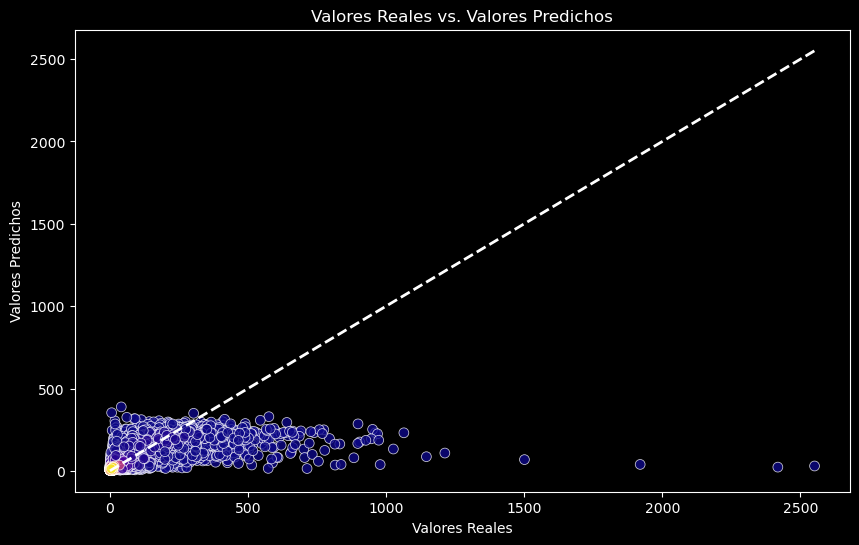

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')
plt.savefig('real_vs_predicho2.png', facecolor='black')

plt.show()

   Feature  Importance
7      A06    0.591096
40     A39    0.075113
14     A13    0.030157
34     A33    0.016649
21     A20    0.015940
..     ...         ...
59     A58    0.002298
60     A59    0.002295
23     A22    0.002243
10     A09    0.002082
16     A15    0.001971

[65 rows x 2 columns]


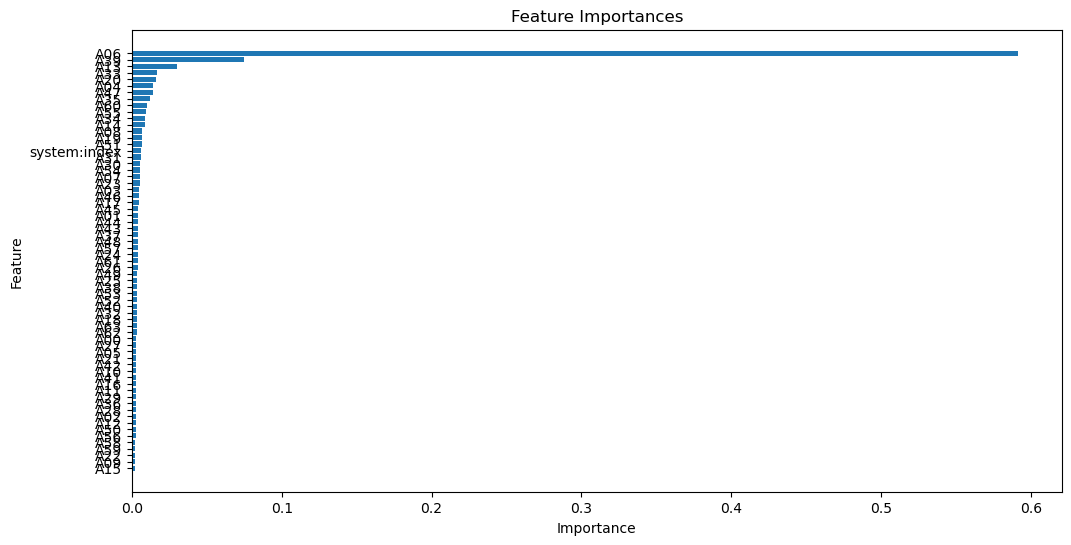

In [25]:
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [37]:
# band_list = [
#     "EVI",
#     "SR_B4",
#     "slope",
#     "elevation",
#     "HH_minus_HV",
#     "SR_B3",
#     "aspect",
#     "SR_B6",
#     "HH_dB_Correlation",
#     "HV_dB_Correlation",
#     "HH_dB_Entropy",
#     "SR_B2",
#     "MNDWI",
#     "NDBI",
#     "HV_dB",

# ]

band_list = ['A06','A39','A13']
trees = ml.rf_to_strings(rf, band_list, output_mode='regression')

In [22]:
# create a ee classifier to use with ee objects from the trees
# ee_classifier = ml.strings_to_classifier(trees)

In [38]:
# this function also works with the ensemble.ExtraTrees estimator
# trees = ml.rf_to_strings(rf, feature_names_reduced,output_mode='regression')

user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/mdg_alhpa"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [65]:
# def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=11):
#     trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
#     total_trees = len(trees)
    
#     # Dividir los árboles en partes
#     for i in range(0, total_trees, part_size):
#         part_trees = trees[i:i+part_size]
#         part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
#         # Exportar la parte
#         ml.export_trees_to_fc(part_trees, part_asset_id)
#         print(f"Parte {i//part_size} exportada a {part_asset_id}")

# # Ejemplo de uso:
# user_id = 'users/facuboladerasgee'
# base_asset_id = f"{user_id}/Rf_Malambique"
# export_model_in_parts(rf, feature_names_reduced, user_id, base_asset_id)

In [65]:
import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Función para entrenar modelos utilizando bootstrap
def bootstrap_models(X_train, y_train, X_test, y_test, n_models=10, random_state=42):

    models = []
    r2_scores = []

    for i in range(n_models):
        # Crear una muestra bootstrap del conjunto de entrenamiento
        X_train_bootstrap, y_train_bootstrap = resample(
            X_train, y_train, replace=True, n_samples=len(y_train), random_state=random_state + i
        )
        
        # Entrenar el modelo en la muestra bootstrap
        model = RandomForestRegressor(
            bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2,
            n_estimators=100, random_state=random_state + i
        )
        model.fit(X_train_bootstrap, y_train_bootstrap)
        
        # Evaluar el modelo en el conjunto de prueba
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        models.append(model)
        
        print(f"Modelo {i+1} entrenado con muestra bootstrap. R²: {r2:.4f}")
    
    return models, r2_scores

# Función para convertir y subir los modelos a GEE
def upload_models_to_gee(models, feature_names_reduced, user_id, base_asset_name="Rf_Bootstrap_Betroka_"):
    """
    Convierte cada modelo en la lista 'models' a formato de string compatible con GEE y sube cada uno como un asset.
    
    Args:
        models: Lista de modelos entrenados.
        feature_names_reduced: Lista de nombres de las características usadas en el modelo.
        user_id: ID del usuario de GEE (ej. 'users/tu_usuario').
        base_asset_name: Prefijo del nombre de los assets a subir en GEE.
    """
    for i, model in enumerate(models):
        # Convertir el modelo a cadenas
        trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
        
        # Especificar el ID del asset para este modelo
        asset_id = f"{user_id}/{base_asset_name}_model_{i+1}"
        
        # Iniciar el proceso de exportación para cada modelo
        ml.export_trees_to_fc(trees, asset_id)
        print(f"Modelo {i+1} subido a GEE con asset_id: {asset_id}")


# Lista de características reducidas (modifica si es necesario)
feature_names_reduced = [
    "EVI",
    "SR_B4",
    "slope",
    "elevation",
    "HH_minus_HV",
    "SR_B3",
    "aspect",
    "SR_B6",
    "HH_dB_Correlation",
    "HV_dB_Correlation",
    "HH_dB_Entropy",
    "SR_B2",
    "MNDWI",
    "NDBI",
    "HV_dB",   
]


# Entrenar los modelos utilizando la función bootstrap_models
models, r2_scores = bootstrap_models(X_train, y_train, X_test, y_test, n_models=10)

# ID de usuario en GEE
user_id = 'users/facuboladerasgee'  # Cambia a tu usuario de GEE
# Llamar a la función para subir los modelos
upload_models_to_gee(models, feature_names_reduced, user_id)

Modelo 1 entrenado con muestra bootstrap. R²: 0.5689
Modelo 2 entrenado con muestra bootstrap. R²: 0.5701
Modelo 3 entrenado con muestra bootstrap. R²: 0.5594
Modelo 4 entrenado con muestra bootstrap. R²: 0.5550
Modelo 5 entrenado con muestra bootstrap. R²: 0.5625
Modelo 6 entrenado con muestra bootstrap. R²: 0.5776
Modelo 7 entrenado con muestra bootstrap. R²: 0.5629
Modelo 8 entrenado con muestra bootstrap. R²: 0.5821
Modelo 9 entrenado con muestra bootstrap. R²: 0.5812
Modelo 10 entrenado con muestra bootstrap. R²: 0.5564
Modelo 1 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_Betroka__model_1
Modelo 2 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_Betroka__model_2
Modelo 3 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_Betroka__model_3
Modelo 4 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_Betroka__model_4
Modelo 5 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_Betroka__model_5
Modelo 6 subido a GEE co